**Capital Asset Pricing Model (CAPM)**

The Capital Asset Pricing Model (CAPM) is a financial model that calculates the expected rate of return for an asset or investment.
CAPM does this by using the expected return on both the market and a risk-free asset, and the asset's correlation or sensitivity to the market (beta).

**Portfolio Returns**


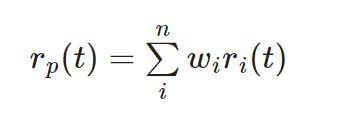

**Market Weights**: (the market cap of this company i) / (market cap of all company from i to j)

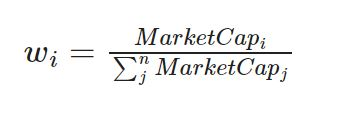

**Portfolio CAPM**

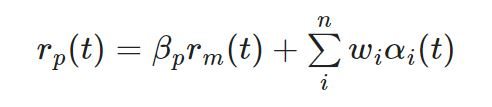

The following analysis will determine the CAPM of a spesific portfolio:

In [ ]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
SPY = pd.read_csv('SPY.csv')
SPY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4788 non-null   object 
 1   Open       4788 non-null   float64
 2   High       4788 non-null   float64
 3   Low        4788 non-null   float64
 4   Close      4788 non-null   float64
 5   Adj Close  4788 non-null   float64
 6   Volume     4788 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 243.2+ KB


In [ ]:
SPY.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4783,2023-08-21,437.549988,440.109985,435.320007,439.339996,439.339996,68719000
4784,2023-08-22,441.179993,441.179993,437.570007,438.149994,438.149994,65062900
4785,2023-08-23,439.250000,443.670013,439.100006,443.029999,443.029999,68441000
4786,2023-08-24,444.690002,445.220001,436.859985,436.890015,436.890015,88517300
4787,2023-08-25,438.679993,441.299988,435.000000,439.970001,439.970001,102297000


In [ ]:
Google = pd.read_csv('GOOG.csv')
Google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4788 non-null   object 
 1   Open       4788 non-null   float64
 2   High       4788 non-null   float64
 3   Low        4788 non-null   float64
 4   Close      4788 non-null   float64
 5   Adj Close  4788 non-null   float64
 6   Volume     4788 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 243.2+ KB


In [ ]:
Google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


**Plot the close price of stock each day**

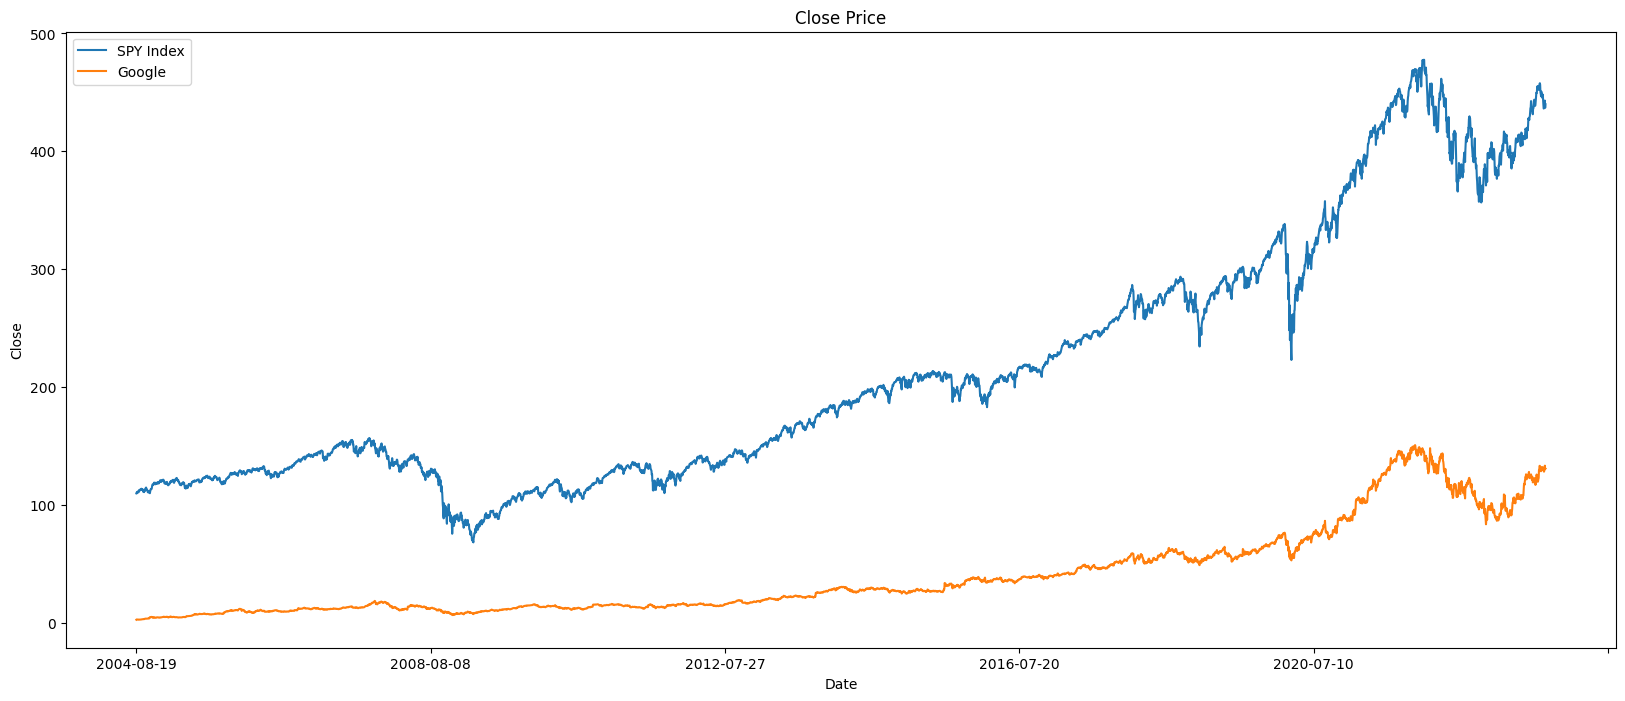

In [ ]:
SPY.plot(label = 'SPY Index', figsize = (20,8), title= 'Close Price', x = 'Date', y = 'Close')
Google['Close'].plot(label = 'Google')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

**Compare Cumulative Return**

In [ ]:
Google['Cumulative'] = Google['Close']/Google['Close'].iloc[0]
SPY['Cumulative'] = SPY['Close']/SPY['Close'].iloc[0]

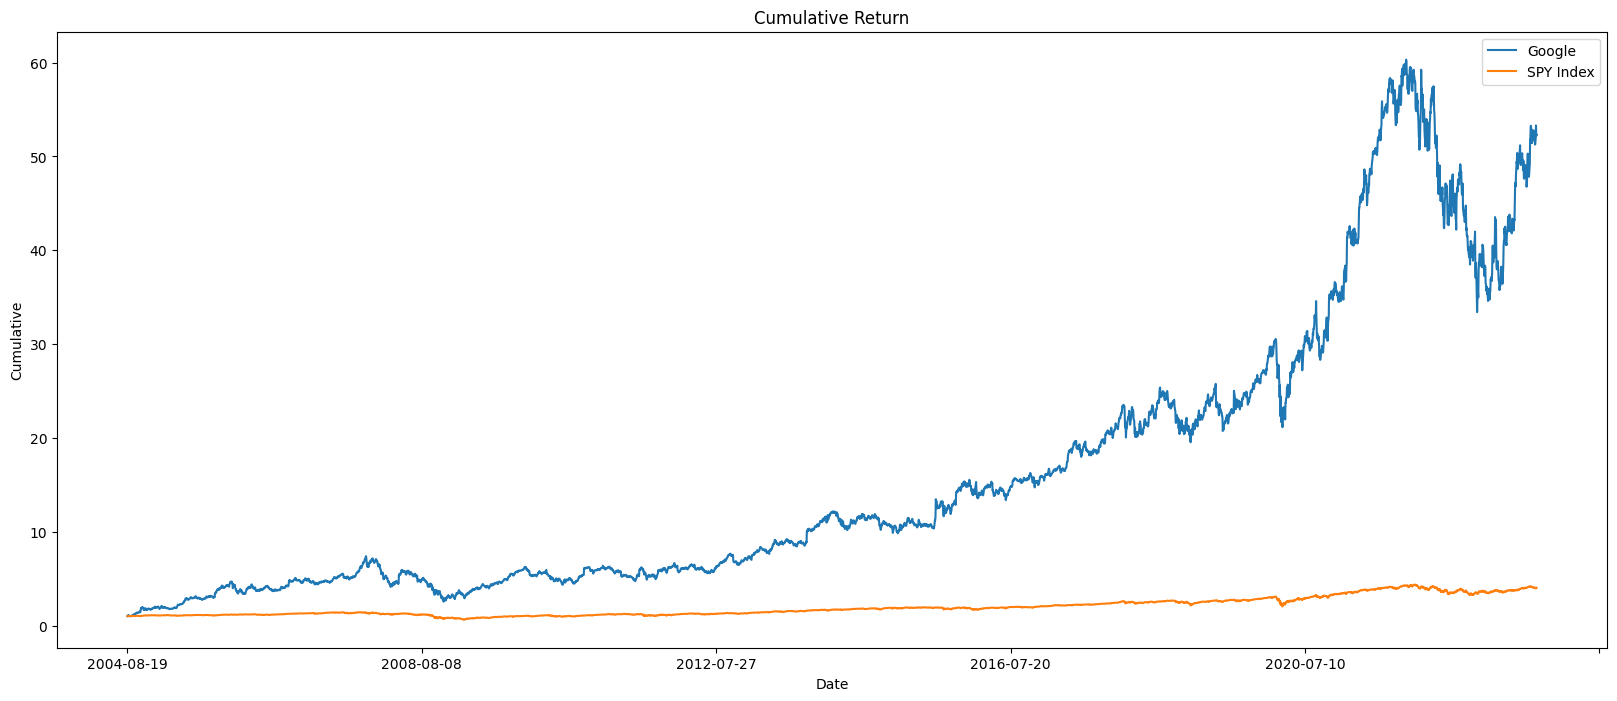

In [ ]:
Google.plot(label = 'Google', figsize = (20,8), title = 'Cumulative Return', x = 'Date', y = 'Cumulative')
SPY['Cumulative'].plot(label = 'SPY Index')
plt.xlabel('Date')
plt.ylabel('Cumulative')
plt.legend()

**Get Daily Return**

In [ ]:
Google['Daily Return'] = Google['Close'].pct_change(1)
SPY['Daily Return'] = SPY['Close'].pct_change(1)

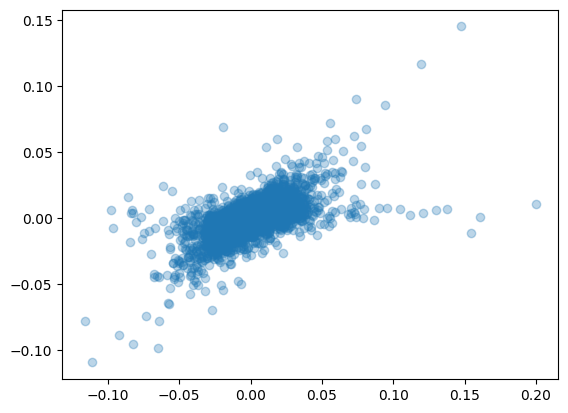

In [ ]:
plt.scatter(Google['Daily Return'],SPY['Daily Return'],alpha=0.3)

<AxesSubplot:>

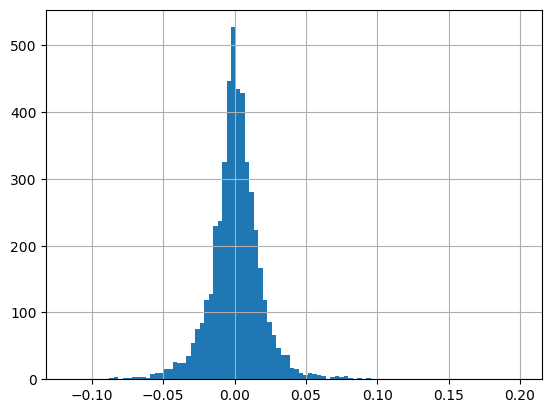

In [ ]:
Google['Daily Return'].hist(bins=100)

<AxesSubplot:>

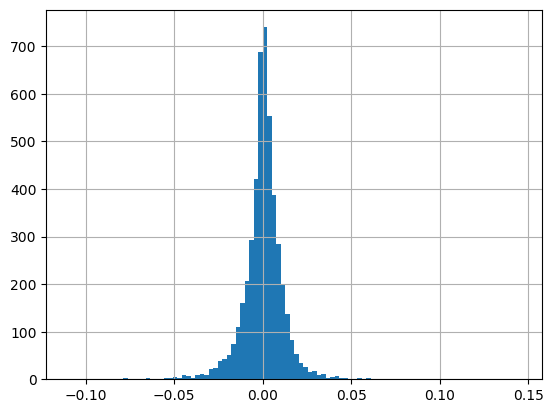

In [ ]:
SPY['Daily Return'].hist(bins=100)

In [ ]:
beta,alpha,r_value,p_value,std_err = stats.linregress(Google['Daily Return'].iloc[1:],SPY['Daily Return'].iloc[1:])

In [ ]:
beta

0.39529283322042474

In [ ]:
alpha

-3.636549042182561e-05

So, alpha is negative which indicates that the current investment portfolio is performing under the benchmark that the investor is trying to match or outperform.

In [ ]:
r_value

0.63014434300863

**What if the stock was completely related to SP500**

In [ ]:
SPY['Daily Return'].head()

0         NaN
1    0.007019
2   -0.002534
3    0.001361
4    0.006797
Name: Daily Return, dtype: float64

In [ ]:
noise = np.random.normal(0,0.001,len(SPY['Daily Return'].iloc[1:]))

In [ ]:
noise

array([-3.23297215e-05,  1.23322508e-04, -1.00777212e-03, ...,
       -5.10536448e-04,  2.55569237e-04, -5.15664673e-04])

In [ ]:
SPY['Daily Return'].iloc[1:] + noise

1       0.006986
2      -0.002411
3       0.000353
4       0.007865
5      -0.000238
          ...   
4783    0.005770
4784   -0.000951
4785    0.010627
4786   -0.013604
4787    0.006534
Name: Daily Return, Length: 4787, dtype: float64

In [ ]:
beta,alpha,r_value,p_value,std_err = stats.linregress(SPY['Daily Return'].iloc[1:]+noise,SPY['Daily Return'].iloc[1:])

In [ ]:
beta

0.992202455474423

As you can see, this demonstrate that beta is the sensitivity of stock A according the flucuation of stock B

In [ ]:
alpha

-5.263874225997834e-06

**Thank you**